<a href="https://colab.research.google.com/github/Rashilajayasinghe/Customer-Churn-Prediction/blob/main/churnpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [92]:
data = pd.read_csv("/content/sample_data/Telco.csv")

In [93]:
data2=data.copy()

In [95]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [96]:
X = data.drop('Churn', axis=1)
Y = data['Churn']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier with specified hyperparameters
dtc = DecisionTreeClassifier(criterion='entropy', random_state=5 ,max_depth=5)

# Train the model on the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

# Calculate and print the accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(y_test, y_pred))
print("\nClassification Report(training):")
print(classification_report(y_train, y_pred_train))


Test Accuracy: 0.7818
Train Accuracy: 0.8021

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407


Classification Report(training):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4164
           1       0.65      0.52      0.58      1461

    accuracy                           0.80      5625
   macro avg       0.75      0.71      0.72      5625
weighted avg       0.79      0.80      0.79      5625



Resampling Using SMOTE

In [99]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X, Y)

In [100]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier with specified hyperparameters
dtc = DecisionTreeClassifier(criterion='entropy', random_state=5 ,max_depth=5)

# Train the model on the training data
dtc.fit(xr_train,yr_train)

# Make predictions on the test data
y_pred_train = dtc.predict(xr_train)
y_pred = dtc.predict(xr_test)

# Calculate and print the accuracy score
accuracy_test = accuracy_score(yr_test, y_pred)
accuracy_train = accuracy_score(yr_train, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(yr_test,y_pred))
print("\nClassification Report(training):")
print(classification_report(yr_train,y_pred_train))

Test Accuracy: 0.9347
Train Accuracy: 0.9423

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       526
           1       0.95      0.92      0.94       623

    accuracy                           0.93      1149
   macro avg       0.93      0.94      0.93      1149
weighted avg       0.94      0.93      0.93      1149


Classification Report(training):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2080
           1       0.96      0.94      0.95      2515

    accuracy                           0.94      4595
   macro avg       0.94      0.94      0.94      4595
weighted avg       0.94      0.94      0.94      4595



## Data Preprocessing for ANN (Feature Scaling)


In [102]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [103]:

for col in data2:
    print(f'{col}: {data2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [104]:
X = data2.drop('Churn',axis='columns')
y = data2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [105]:
X_train.shape

(5625, 26)

In [106]:
X_test.shape

(1407, 26)

## Building the ANN Model

In [107]:

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6188 - loss: 0.6240
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4295
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4258
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4274
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4068
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - loss: 0.4085
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.4051
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4028
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4094
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.4121
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.3954
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Evaluating the ANN Model


In [108]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.23922504],
       [0.396603  ],
       [0.00197793],
       [0.6617244 ],
       [0.6664566 ]], dtype=float32)

In [109]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [110]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [111]:
y_test[:10]

,Churn
2655,0
743,0
5570,1
64,1
3282,1
814,1
2665,0
5911,0
1020,0
6078,0


In [112]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# Convert continuous predictions to binary (0 or 1) for the training set
y_pred_train= (model.predict(X_train) > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(y_test, y_pred))
print("\nClassification Report(training):")
print(classification_report(y_train, y_pred_train))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.7626
Train Accuracy: 0.8432

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.61      0.50      0.55       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.75      0.76      0.76      1407


Classification Report(training):
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4164
           1       0.74      0.61      0.67      1461

    accuracy                           0.84      5625
   macro avg       0.81      0.77      0.78      5625
weighted avg       0.84      0.84      0.84      5625



Text(95.72222222222221, 0.5, 'Truth')

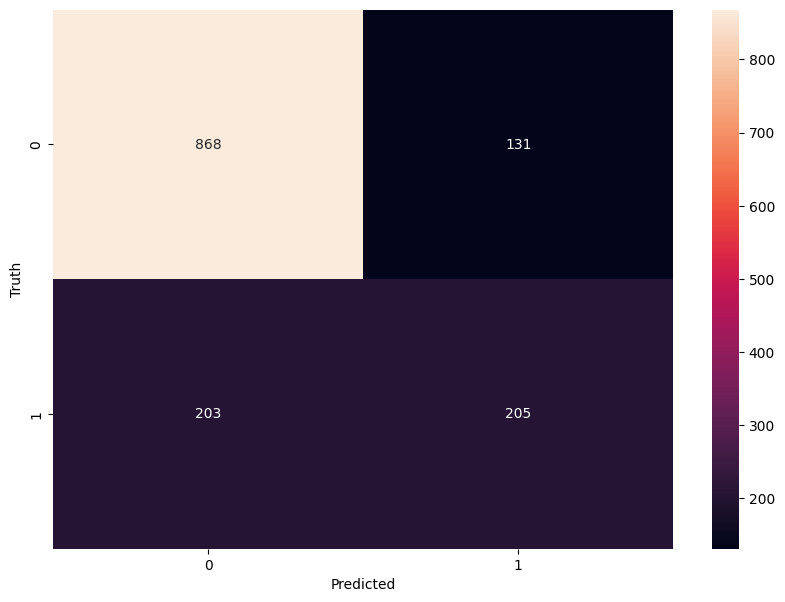

In [113]:
import seaborn as sn
from matplotlib import pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Resampling Using SMOTE

In [114]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resampled2, y_resampled2 = sm.fit_resample(X, y)

In [115]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(x_resampled2, y_resampled2,test_size=0.2)

In [116]:
xr_train2.shape

(4953, 26)

In [117]:
xr_test2.shape

(1239, 26)

In [142]:
import tensorflow as tf
from tensorflow import keras

model2 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.3),                # Dropout to reduce overfitting
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model2.fit(
    xr_train2, yr_train2,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    batch_size=32
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6297 - loss: 0.6344 - val_accuracy: 0.8930 - val_loss: 0.3394
Epoch 2/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8718 - loss: 0.3338 - val_accuracy: 0.8951 - val_loss: 0.2492
Epoch 3/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9002 - loss: 0.2703 - val_accuracy: 0.9062 - val_loss: 0.2295
Epoch 4/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9061 - loss: 0.2509 - val_accuracy: 0.9072 - val_loss: 0.2207
Epoch 5/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9077 - loss: 0.2427 - val_accuracy: 0.9041 - val_loss: 0.2178
Epoch 6/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9165 - loss: 0.2227 - val_accuracy: 0.9031 - val_loss: 0.2179
Epoch 7/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9191 - loss: 0.2051 - val_accuracy: 0.9152 - val_loss: 0.2069
Epoch 8/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9149 - loss: 0.2117 - val_

In [143]:
yp = model2.predict(xr_test2)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [144]:
y_pred[:10]

[0, 0, 0, 1, 1, 0, 1, 1, 0, 1]

In [145]:
yr_test2[:10]

,Churn
1431,0
1868,0
4937,1
6186,1
4344,1
2091,0
4120,1
5040,1
1289,0
3795,1


In [146]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# Convert continuous predictions to binary (0 or 1) for the training set
y_pred_train= (model2.predict(xr_train2) > 0.5).astype(int)


# Calculate and print the accuracy score
accuracy_test = accuracy_score(yr_test2, y_pred)
accuracy_train = accuracy_score(yr_train2, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(yr_test2,y_pred))
print("\nClassification Report(training):")
print(classification_report(yr_train2,y_pred_train))

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.9475
Train Accuracy: 0.9635

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       553
           1       0.95      0.96      0.95       686

    accuracy                           0.95      1239
   macro avg       0.95      0.95      0.95      1239
weighted avg       0.95      0.95      0.95      1239


Classification Report(training):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2227
           1       0.97      0.97      0.97      2726

    accuracy                           0.96      4953
   macro avg       0.96      0.96      0.96      4953
weighted avg       0.96      0.96      0.96      4953



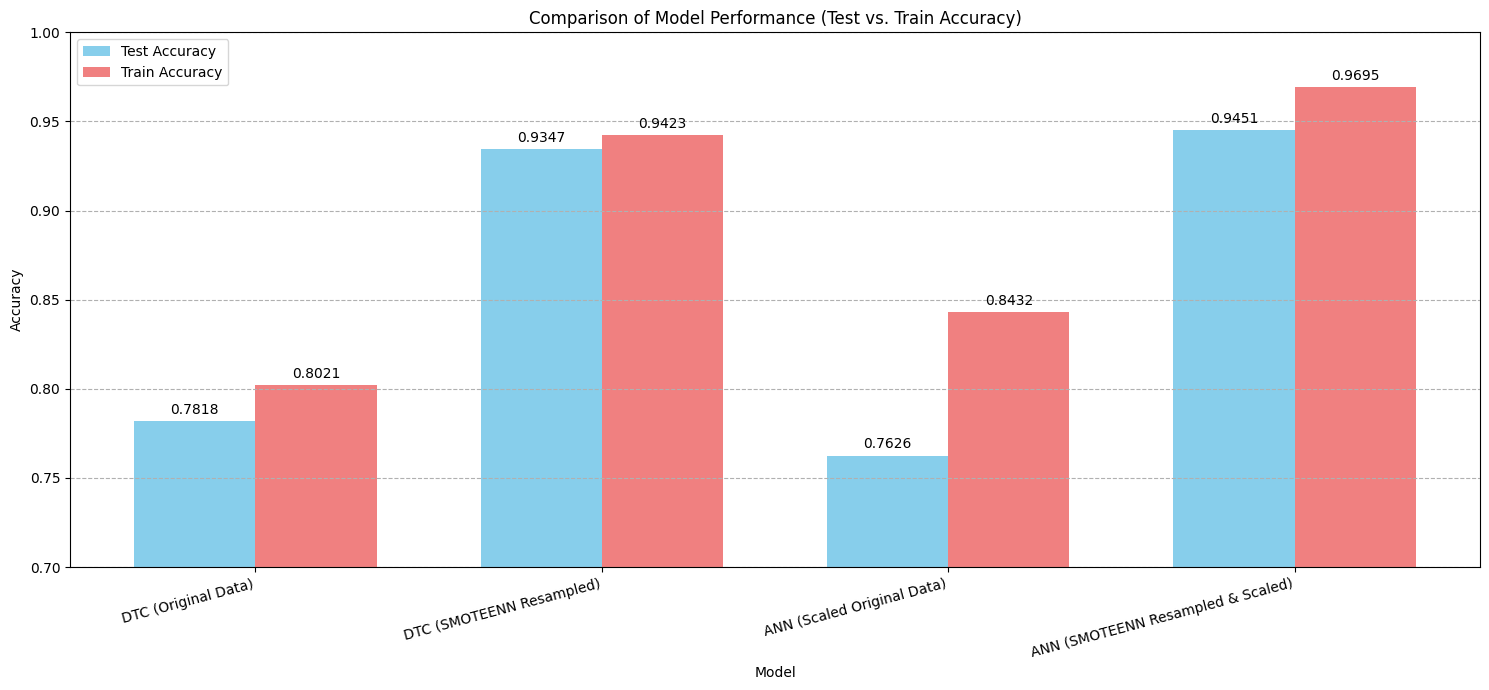

In [147]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    'DTC (Original Data)',
    'DTC (SMOTEENN Resampled)',
    'ANN (Scaled Original Data)',
    'ANN (SMOTEENN Resampled & Scaled)'
]

# These values are taken from the previous cell outputs
test_accuracies = [
    0.7818,  # DTC on original data test accuracy
    0.9347,  # DTC on SMOTEENN resampled data test accuracy
    0.7626,  # ANN on scaled original data test accuracy
    0.9451   # ANN on SMOTEENN resampled & scaled data test accuracy
]

train_accuracies = [
    0.8021,  # DTC on original data train accuracy
    0.9423,  # DTC on SMOTEENN resampled data train accuracy
    0.8432,  # ANN on scaled original data train accuracy
    0.9695   # ANN on SMOTEENN resampled & scaled data train accuracy
]


x = np.arange(len(model_names))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(15, 7))

rects1 = plt.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='skyblue')
rects2 = plt.bar(x + width/2, train_accuracies, width, label='Train Accuracy', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance (Test vs. Train Accuracy)')
plt.xticks(x, model_names, rotation=15, ha='right')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--')
plt.legend()

def autolabel(rects, accuracies):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        plt.annotate(f'{accuracies[i]:.4f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1, test_accuracies)
autolabel(rects2, train_accuracies)

plt.tight_layout()
plt.show()

In [94]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [148]:
import pickle

# Assuming the 'model' variable currently holds the highest accuracy ANN model
# You might want to rename it if you have multiple models in scope
filename = 'highest_accuracy_ann_model.pkl'
pickle.dump(model2, open(filename, 'wb'))

print(f"Model saved successfully as {filename}")

Model saved successfully as highest_accuracy_ann_model.pkl
